## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single datas
complete_df = pd.merge(mouse_metadata, study_results, how ="left", on =["Mouse ID", "Mouse ID"])
complete_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
complete_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen
total_mean = complete_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
total_median = complete_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
total_var = complete_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
total_std = complete_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
total_sem = complete_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

data_df = pd.DataFrame({"Mean":total_mean,
                        "Median":total_median,
                        "Variance":total_var,
                        "STD":total_std,
                        "SEM":total_sem
})

data_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

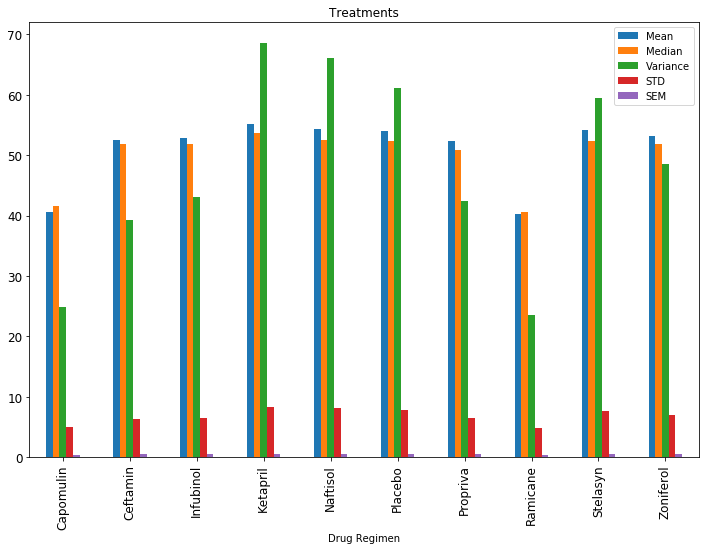

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_df.plot(kind='bar', title ="Treatments", figsize=(12, 8), legend=True, fontsize=12)
plt.show()

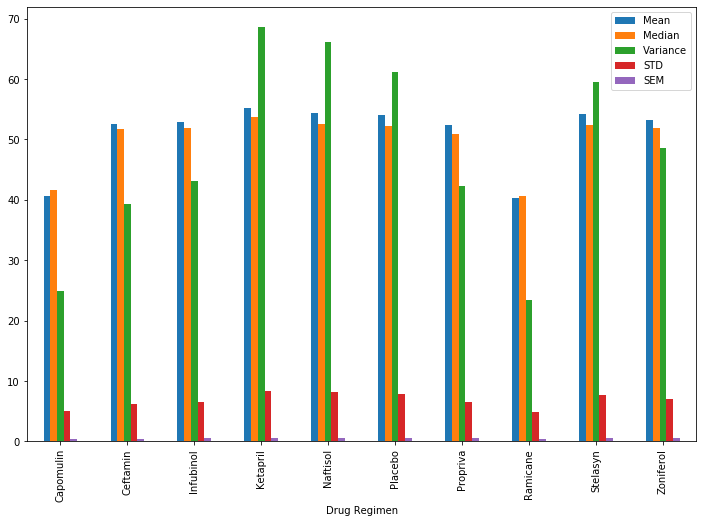

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_df.plot.bar(figsize=(12, 8))
plt.show()

## Pie plots

In [6]:
unique_data = complete_df.copy()


In [7]:
#Drop the duplicates in Mouse ID

unique_data.drop_duplicates(subset = "Mouse ID",keep = 'first', inplace = True)
unique_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
#Get the amount of females and males
sex = unique_data.groupby(["Sex"]).count()["Mouse ID"]
sex

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

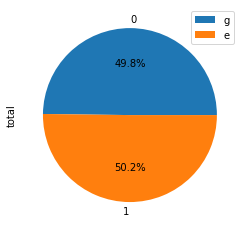

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = pd.DataFrame({'gender':['Female','Male'], 'total':[124,125]})
index=['Female', 'Male']
df.plot.pie(y = 'total', autopct="%1.1F%%", legend='gender')
plt.legend(loc='best', labels='gender')
#df.plot(kind='pie', title ="Treatments", figsize=(12, 8), legend=True, fontsize=12)
plt.show()

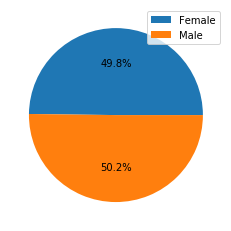

In [53]:
gender=['Female','Male']
total=['124','125']
plt.pie(total, shadow=False, textprops=None, autopct="%1.1F%%")
plt.legend(loc='best', labels=gender)
plt.show()

## Quartiles, outliers and boxplots

In [11]:
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
max_tumor = complete_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
mouse_data = max_tumor[["Mouse ID", "Timepoint"]].merge(complete_df, on=["Mouse ID", "Timepoint"])
mouse_data
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
c_data = mouse_data.loc[mouse_data["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
d_data = mouse_data.loc[mouse_data["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
e_data = mouse_data.loc[mouse_data["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
f_data = mouse_data.loc[mouse_data["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]

In [30]:
quartiles = c_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound, upper_bound)

20.70456164999999 51.83201549


In [31]:
quartiles = d_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound, upper_bound)

17.912664470000003 54.30681135


In [32]:
quartiles = e_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound, upper_bound)

25.355449580000002 87.66645829999999


In [33]:
quartiles = f_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound, upper_bound)

36.83290494999999 82.74144559000001


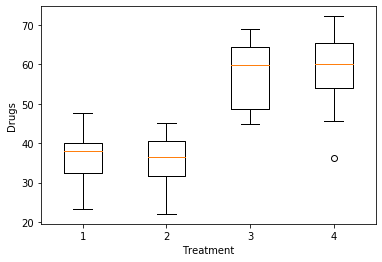

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([c_data, d_data, e_data, f_data])
plt.xlabel('Treatment')
plt.ylabel('Drugs')
plt.show()

## Line and scatter plots

In [19]:
sue = complete_df.set_index(["Drug Regimen", "Mouse ID"])


In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug = sue.loc['Capomulin',:]
drug = drug.reset_index()
drug_data = drug.loc[drug["Mouse ID"]== "s185"]
drug_data


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Female,3,17,0,45.000000,0
1,s185,Female,3,17,5,43.878496,0
2,s185,Female,3,17,10,37.614948,0
3,s185,Female,3,17,15,38.177232,0
4,s185,Female,3,17,20,36.866876,0
5,s185,Female,3,17,25,33.949940,0
6,s185,Female,3,17,30,32.959671,1
7,s185,Female,3,17,35,28.328531,1
8,s185,Female,3,17,40,25.472143,1
9,s185,Female,3,17,45,23.343598,1


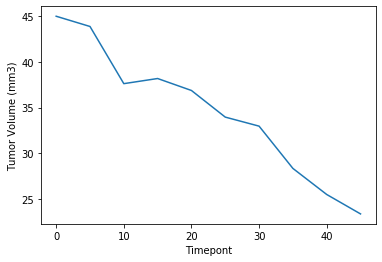

In [41]:
plt.plot(drug_data["Timepoint"], drug_data["Tumor Volume (mm3)"])
plt.xlabel('Timepont')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug = sue.loc['Capomulin',:]
drug = drug.reset_index()
drug_d = drug.groupby(["Mouse ID"]).mean()
drug_d

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


The r-squared is: 0.8419363424694718


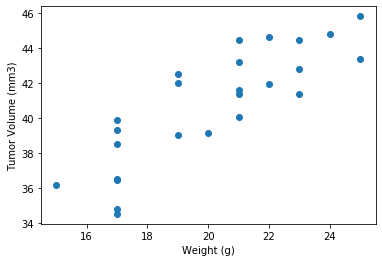

In [39]:
plt.scatter(drug_d["Weight (g)"], drug_d["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
#tumor volume for the Capomulin regimen

corr_drug=round(st.pearsonr(drug_d['Weight (g)'],drug_d['Tumor Volume (mm3)'])[0],2)
corr_drug

0.84

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(drug_d["Weight (g)"], drug_d["Tumor Volume (mm3)"])
regress_values = drug_d["Weight (g)"] * slope + intercept
regress_values 

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

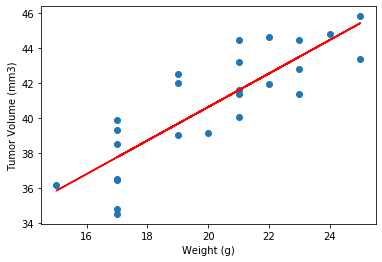

In [40]:
plt.scatter(drug_d["Weight (g)"], drug_d["Tumor Volume (mm3)"])
plt.plot(drug_d["Weight (g)"],regress_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()